In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

* What is the probability that no cars drive up in the noon hour?
* What is the probability that 3 or more cars come through the drive through?
* How likely is it that the drive through gets at least 1 car?

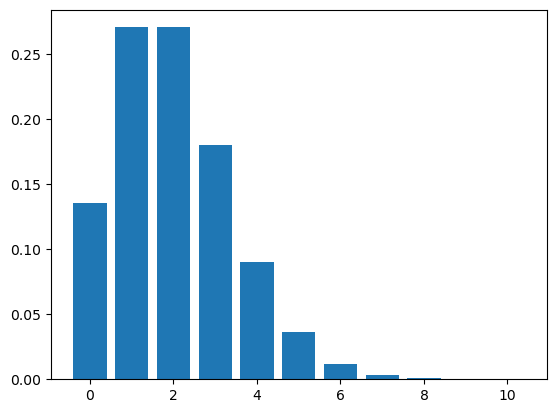

In [2]:
cars = stats.poisson(2)
y = [cars.pmf(n) for n in range(0,11)]
plt.bar(range(0,11),y)
plt.show()

In [3]:
y[0] # no cars at noon

0.1353352832366127

In [4]:
cars.sf(2) # chances of 3 cars or more

0.32332358381693654

In [5]:
cars.sf(0) # chances of one or more cars

0.8646647167633873

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

* What grade point average is required to be in the top 5% of the graduating class?
* What GPA constitutes the bottom 15% of the class?
* An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
* If I have a GPA of 3.5, what percentile am I in?

In [6]:
gpa = stats.norm(3.0,0.3)
gpa.rvs(5)

array([3.03175322, 2.25495383, 3.24288922, 3.14127908, 3.04327554])

In [7]:
gpa.isf(.05) # top 5% gpa

3.4934560880854417

In [8]:
gpa.ppf(.15) # bottom 15% 

2.689069983151863

In [9]:
deciles = [gpa.ppf(n/10) for n in [2,3]]
deciles # students between this range of gpa would qualify for the scholarship
# a student with a gpa of 2.8 would qualify

[2.7475136299281258, 2.842679846187588]

In [10]:
gpa.cdf(3.5) * 100 # 95th percentile

95.22096477271853

3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [11]:
# use binom because they either clicked or didnt
click = stats.binom(4326,.02)

In [12]:
click.sf(96)

0.13975823631416448

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

* What is the probability that at least one of your first 60 answers is correct?

In [13]:
answers = stats.binom(60,1/101)
answers.sf(0) # probability of getting more than 0 questions right in the first 60

0.44955038406224

5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [14]:
# 3 * 22 = 66
# 66 * .90 = 59.4 students
clean = stats.binom(59,.03)
daily_clean = clean.sf(0)
daily_clean # 0.8342199288437352 chances of being cleaned each day

0.8342199288437352

In [15]:
two_clean = stats.binom(2,daily_clean)
two_clean.pmf(0) # chances of not being cleaned two days in a row

0.027483031992576224

In [26]:
week_clean = stats.binom(5,daily_clean) # chances of not being cleaned in a week
week_clean.pmf(0)

0.00012521651388091348

In [17]:
week_clean.sf(0)

0.999996558670543

6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [28]:
60-10
50-15
35-2 
33/2 # max number of people. Rounded down to 16 because you cant have half people

16.5

In [29]:
lunch = stats.norm(15,3)
1 - lunch.sf(16) # calculate likelyhood of more than 16 people being there. 17 means 36 min to order 46 to recieve food 
                    #leaving 14 only to eat.
# 74.75% chance youll be able to ahve 15 min or more to eat

0.6305586598182363

7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

* What percent of employees earn less than 60,000?
* What percent of employees earn more than 95,000?
* What percent of employees earn between 65,000 and 80,000?
* What do the top 5% of employees make?

In [20]:
import pandas as pd
import env
from sqlalchemy import text, create_engine

url = env.get_connection('employees')
engine = create_engine(url)
sal = text('''
        SELECT AVG(salary),STDDEV(salary) FROM employees as E
        JOIN salaries as S USING(emp_no)
        WHERE to_date > CURDATE()
        ''')
s = pd.read_sql(sal,engine.connect())
s

,AVG(salary),STDDEV(salary)
0,72012.2359,17309.959336


In [21]:
salary = stats.norm(72_012.24,17309.96)

In [22]:
1 - salary.sf(60_000) #~24.38% earn less than 60k

0.24385690499062396

In [23]:
salary.sf(95_000)

0.09208778318255045

In [24]:
salary.cdf(80_000)-salary.cdf(65_000)

0.3350612132350322

In [25]:
salary.isf(.05)

100484.59048838491